# Reportando errores

Si tiene alguna sugerencia o corrección, puede escribirme a maurosilber@gmail.com

Puede descargar este notebook desde [aquí](http://users.df.uba.ar/maurosilber/docencia/errores.ipynb)

### 1. Gaussiana: media y desviación estandar

### 2. Error del promedio: estimando la media

### 3. Error instrumental: de resolución y sistemáticos **(proximamente)**

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

## Gaussiana: media y desviación estándar

Para este ejemplo, vamos a estar usando una distribución gaussiana o normal de media $\mu = 100$ y desviación estandar $\sigma = 5$.

In [2]:
media, sigma = 100, 5
X = stats.norm(loc=media, scale=sigma)  # Creamos la distribución. X es una gaussiana

Para generar un dato o "realizar una medición" usamos el método .rvs()

In [3]:
X.rvs()  # tambien podemos usar np.random.normal para generar datos

100.92172160684636

Si queremos generar varios datos juntos, le podemos pasar el parametro "size"

In [4]:
X.rvs(size=4)

array([105.47935527, 104.3719545 , 106.50849775,  96.40299382])

Generemos muchos datos y grafiquemos para ver como se vé.

Promedio 99.95
Desv. est. 5.00


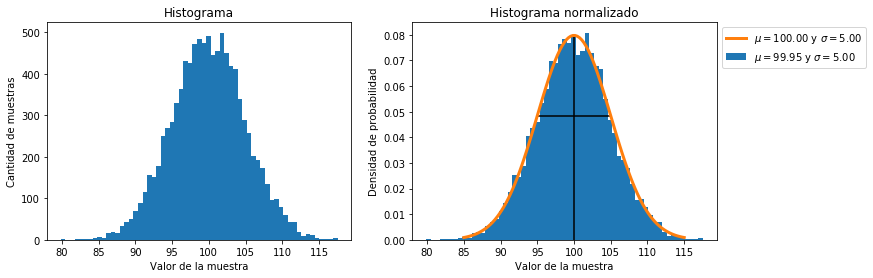

In [5]:
muestra = X.rvs(size=10_000)  # Generamos 10.000 datos

print('Promedio', f'{muestra.mean():.2f}')
print('Desv. est.', f'{muestra.std():.2f}')

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
ax[0].hist(muestra, bins='fd')
ax[0].set(xlabel='Valor de la muestra', ylabel='Cantidad de muestras', title='Histograma')

# Histograma normalizado y 
t = np.linspace(-3, 3, 100) * sigma + media
ax[1].hist(muestra, bins='fd', density=True, label=f'$\\mu = {muestra.mean():.2f}$ y $\\sigma = {muestra.std():.2f}$')
ax[1].plot(t, X.pdf(t), lw=3, label=f'$\\mu = {media:.2f}$ y $\\sigma = {sigma:.2f}$')
ax[1].vlines(media, 0, X.pdf(media))
ax[1].hlines(X.pdf(media+sigma), media-sigma, media+sigma)

ax[1].set(xlabel='Valor de la muestra', ylabel='Densidad de probabilidad', title='Histograma normalizado')
ax[1].legend(bbox_to_anchor=(1, 1), loc='upper left');

A la derecha, estamos comparando el histograma normalizado con la densidad de probabilidad de la gaussiana, donde se marca con una linea vertical la posición de la media y una linea horizontal de ancho igual a la desviación estandar.

Sabemos que la media real es 100, pero el promedio de nuestra muestra no es exactamente 100, porque estamos usando una cantidad finita de datos.

¿Qué nos dicen la media y la desviación estandar? En el caso de la normal, nos dan un intervalo en el que esperamos encontrar el $68.3\%$ de las muestras. Veamos si se cumple.

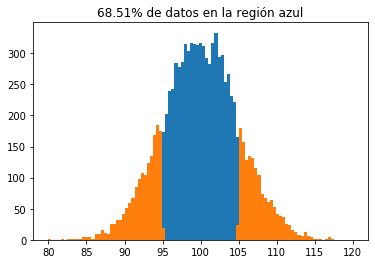

In [6]:
mask = (muestra > media - sigma) & (muestra < media + sigma)  # Esto es un vector de 0 (False) y 1 (True)
fraccion_de_datos = mask.sum() / muestra.size 

bins = np.linspace(-4, 4, 100) * sigma + media
plt.hist(muestra[mask], bins=bins)
plt.hist(muestra[~mask], bins=bins);
plt.title(f'{fraccion_de_datos:.2%} de datos en la región azul');

De nuevo, como nuestra muestra es finita, no nos da exactamente ese valor.

## Error del promedio

Entonces, el promedio de una muestra finita no es exactamente la media. ¿En cuánto difieren? ¿Cuál es su error?

Hagamos el siguiente experimento. De nuestra distribución gaussiana original (con media $\mu = 100$ y desv. est. $\sigma = 5$) tomemos 10 muestras y calculemos el promedio. Repitamos este procedimiento multiples veces y observemos como varía el promedio.

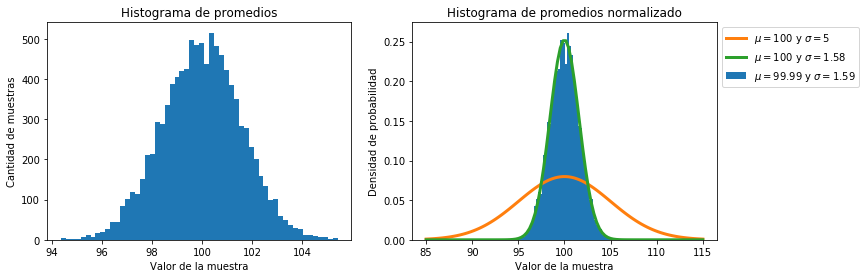

In [7]:
muestras = X.rvs(size=[10, 10_000]).mean(axis=0)  # Ahora cada muestra es el promedio de 10 valores de la gaussiana original

# La linea de arriba es equivalente a esto que sigue
# >>> muestras = []
# >>> for i in range(1_000):
# >>>    submuestras = X.rvs(10)
# >>>    promedio_submuestras = submuestras.mean()
# >>>    muestras.append(promedio_submuestras)

nuevo_sigma = sigma / np.sqrt(10)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(muestras, bins='fd')
ax[0].set(xlabel='Valor de la muestra', ylabel='Cantidad de muestras', title='Histograma de promedios')

t = np.linspace(-3, 3, 100) * sigma + media
ax[1].hist(muestras, bins='fd', density=True, label=f'$\\mu = {muestras.mean():.2f}$ y $\\sigma = {muestras.std():.2f}$')
ax[1].plot(t, X.pdf(t), lw=3,
           label=f'$\\mu={media}$ y $\\sigma={sigma}$')
ax[1].plot(t, stats.norm.pdf(t, loc=media, scale=nuevo_sigma), lw=3, label=f'$\\mu={media}$ y $\\sigma={nuevo_sigma:.2f}$')

ax[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
ax[1].set(xlabel='Valor de la muestra', ylabel='Densidad de probabilidad', title='Histograma de promedios normalizado');

En naranja se ve la densidad de probabilidad original, mientras que en azul se ve el histograma de promedios.

De las muestras de promedios de 10 datos, podemos decir que están centrados en el valor de la media, pero tienen un ancho menor que la distribución original: el promedio de las muestras de 10 promedios es ~100 y su desviación estandar es ~1.58.

Para que quede claro, cada dato o muestra representado en el histograma azul es el promedio de 10 muestras tomadas de la distribución naranja. Una forma gráfica de ver que estamos haciendo es la siguiente:

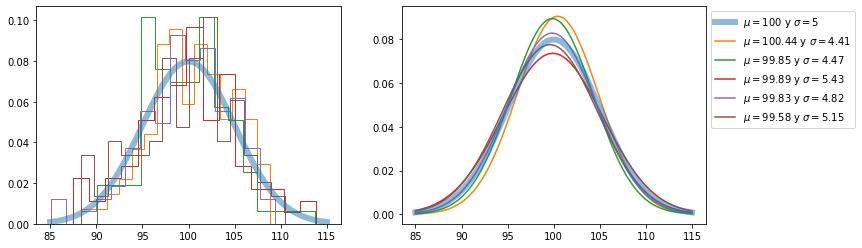

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for a in ax:
    a.plot(t, X.pdf(t), label=f'$\\mu={media}$ y $\\sigma={sigma}$', zorder=100, alpha=0.5, lw=6)
    
for _ in range(5):
    muestra = X.rvs(100)
    ax[0].hist(muestra, bins=15, histtype='step', density=True)
    media_muestra, sigma_muestra = muestra.mean(), muestra.std()
    ax[1].plot(t, stats.norm(loc=media_muestra, scale=sigma_muestra).pdf(t),
               label=f'$\\mu={media_muestra:.2f}$ y $\\sigma={sigma_muestra:.2f}$')

ax[1].legend(bbox_to_anchor=(1, 1), loc='upper left')

En los gráficos, se muestra la gaussiana real de donde tomamos las muestras. Para los demás colores, cada uno representa una muestra de 100* valores. A la izquierda se muestra el histograma de esos 100 valores, y a la derecha la gaussiana graficada con la estimación del promedio y desviación estandar que obtenemos de dicha muestra.

Cada muestra estima esa media con un error, pero se vé que el centro de esas gaussianas está mucho más cerca del centro real que lo que nos dice la desviación estandar. El error del promedio es menor que la desviación estandar de la muestra original.

¿Qué pasa si tomamos cada vez más datos para calcular el promedio?
Es decir, vamos a tomar N muestras y realizar el promedio. Y repetir eso mismo muchas veces.

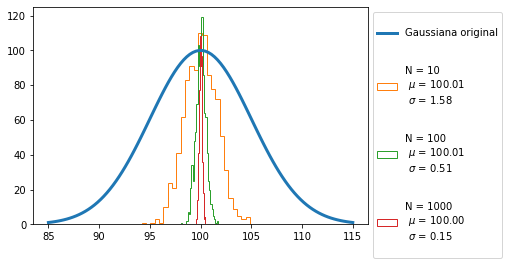

In [58]:
t = np.linspace(-3, 3, 100) * sigma + media
plt.plot(t, 100/X.pdf(100) * X.pdf(t), lw=3, label=f'\nGaussiana original\n')

for N_muestras in (10, 100, 1000):
    muestra = X.rvs(size=[N_muestras, 1_000]).mean(axis=0)  # 1.000 promedios de N_muestras datos
    plt.hist(muestra, bins='fd', histtype='step',
             label=f'\nN = {N_muestras} \n $\\mu$ = {muestra.mean():.2f} \n $\\sigma$ = {muestra.std():.2f} \n')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

A medida que tomamos más muestras para realizar el promedio, más angosta es la distribución de estos. Es lo que esperaban, ¿no? A medida que más muestras se consideran para calcular el promedio, más preciso será este.

Entonces, ¿cómo podemos estimar el error del promedio? Una forma sencilla de verlo es a través de propagación de errores.

### Propagación de errores en el promedio

El promedio no es algo que medimos directamente, sino un cálculo a partir de muchas mediciones. Es una medición indirecta. Si sabemos el error en cada medición original, podemos propagar el error y obtener el error del promedio.

El promedio es una función de los datos:

$$\bar{x} = \frac{x_1 + ... + x_n}{N} = f(x_1, ..., x_n)$$

donde cada dato tiene asociado un error $\sigma_i$

$$x_i \to x_i \pm \sigma_i$$

que en nuestro caso es el $\sigma_i = \sigma = 5$ de la distribución inicial.

Si aplicamos la formula de propagación de errores,

$$\sigma_{\bar{x}}^2 = \sum_i \left( \frac{\partial f}{\partial x_i} \sigma_i \right)^2 = \frac{1}{N^2} \sum_i \sigma_i^2$$

Como todos los errores son iguales ($\sigma_i = \sigma$ para todo $i$):

$$\sigma_{\bar{x}}^2 = \frac{N \sigma^2}{N^2} = \frac{\sigma^2}{N} $$

O, como es más conocida:

$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}}$$

Este $\sigma_\bar{x}$, la desviación estandar del promedio, tiene una interpretación idéntica a la anterior: si repetimos el experimento muchas veces, el 68.3% de los datos van a caer en el intervalo $\bar{x} \pm \sigma_\bar{x}$.

Pero, ojo: el experimento no es medir una vez. El experimeto es medir $N$ veces y calcular el promedio.

### Ejemplo

Relacionemoslo con un experimento real para fijar ideas.

Un experimento típico en Laboratorio 1 es medir *el periodo del faro*, que no es otra cosa que un LED que titila a una frecuencia fija. Uno agarra el cronómetro, mide muchas veces el tiempo entre destellos y calcula todo lo que le enseñaron en la clase hasta el momento.

Tomemos prestados los resultados de un grupo de alumnos:

A partir de $N = 100$ muestras, se obtuvo un promedio $\bar{x} = 1.16 s$ y una desviación estandar de $\sigma_x = 0.51 s$. Podemos calcular entonces el error del promedio como

$$\sigma_\bar{x} = \frac{\sigma_x}{\sqrt{N}} = \frac{0.51 s}{\sqrt{100}} = 0.051 s$$

Entonces, ¿qué reportamos como el periodo del faro?

1. $(1.16 \pm 0.51) \, s$
2. $(1.16 \pm 0.05) \, s$

Las dos desviaciones estándar están reportando cosas distintas:

1. $\sigma_x = 0.51 s$ es el error de 1 medición, y viene dado en este caso por tiempo de respuesta del alumno al accionar el cronómetro.
2. $\sigma_\bar{x} = 0.05$ es nuestro error en el promedio, y representa que tan bien conocemos el valor "real" del periodo del faro.

Entonces, si queremos reportar el periodo del faro, reportariamos la opción 2, con el error del promedio.

Si siguieramos tomando más mediciones, $\sigma_\bar{x}$ va a disminuir (como $\frac{1}{\sqrt{N}}$), y vamos a tener cada vez más precisión en el valor "real".
En cambio, si siguieramos tomando más mediciones, $\sigma_x$ no va a disminuir, porque independientemente de cuantas mediciones tomemos, el alumno no se va a convertir en un robot con un reloj atómico... Va a seguir teniendo su mismo tiempo de respuesta.

### Extra: aclaraciones para quisquillosos

Proximamente unos detalles estadisticos que pasamos por alto.